In [1]:
## import important libaries
import numpy as np
import pandas as pd
from sklearn import svm, metrics,preprocessing
from sklearn.neighbors import KNeighborsClassifier
#from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm
# import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

In [2]:
path="/home/sultan/EEG/Source_level_frequency_analysis/100_base_corr_sam_NHIerp_band_features_clear.csv"
## the below one is the band_features
##path="/home/sultan/EEG/Source_level_frequency_analysis/100sam_NHIerp_band_features_clear.csv"
# path="/home/sultan/EEG/Source_level_frequency_analysis/100sam_NHIerp_band_features_noise.csv"
dataset =pd.read_csv(path)

In [3]:
Xc=dataset.iloc[:,2:].values
y=dataset.iloc[:,1].values
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(Xc)

In [4]:
rs=16

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=rs) 

In [6]:
X_test.shape, y_test.shape

((373, 272), (373,))

In [7]:
np.unique(y_test)
np.unique(y_test,return_counts=True)

(array([0., 1.]), array([159, 214]))

# Grid search

In [8]:
cv=5
from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[1, 6.5, 10,20,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
parameters = {'kernel':['rbf'], 'C':[1, 6.5, 10,20,100,1000],'gamma':[0.01,0.002,0.00069,0.0007,0.0005]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=cv)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [1, 6.5, 10, 20, 100, 1000], 'gamma': [0.01, 0.002, 0.00069, 0.0007, 0.0005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [9]:
# cv=5
# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[0.90,1.00,1.25],'gamma':[3.0,3.25,3.25 ]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters,cv=cv)
# clf.fit(X_train, y_train)

In [10]:
# Average Scores
#  print clf.cv_results_
# clf.best_estimator_
# np.mean
scores=clf.cv_results_['mean_test_score']
print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))

Accuracy:0.912 (+/-0.068)


In [11]:
pred=clf.best_estimator_.predict(X_test)
acc=clf.score(X_test, y_test)
print ("Accuracy:", acc)  
# print pred
# print y_test
print "support:", len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

('Accuracy:', 0.9490616621983914)
support: 25.1344086022


In [12]:
conf_mat=confusion_matrix(y_test,pred)
conf_mat

array([[149,  10],
       [  9, 205]])

In [13]:
from sklearn.metrics import classification_report
#target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

        0.0       0.94      0.94      0.94       159
        1.0       0.95      0.96      0.96       214

avg / total       0.95      0.95      0.95       373



In [14]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9475254217363194

In [15]:
clf.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.002, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### KNN 

In [16]:
clfknn = KNeighborsClassifier(n_neighbors=5)
clfknn.fit(X_train, y_train)
predk=clfknn.predict(X_test)
acck=clfknn.score(X_test, y_test)
print ("Accuracy:", acck)  
print(confusion_matrix(y_test, predk))
print(classification_report(y_test, predk))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,predk)
roc_auck = auc(false_positive_rate, true_positive_rate)
print ('roc',roc_auck)

('Accuracy:', 0.9276139410187667)
[[142  17]
 [ 10 204]]
             precision    recall  f1-score   support

        0.0       0.93      0.89      0.91       159
        1.0       0.92      0.95      0.94       214

avg / total       0.93      0.93      0.93       373

('roc', 0.9231763945218362)


### Whole brain accuracy and AUC

In [17]:
whc=pd.DataFrame([acc,roc_auc])
whc

,0
0,0.949062
1,0.947525


In [18]:
## whole brain level analysis
# whc=pd.DataFrame([acc,roc_auc,acck,roc_auck])
# whc

In [19]:
# cv=5
# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[1],'gamma':[0.01 ]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters,cv=cv)
# clf.fit(X_train, y_train)

In [20]:
k=0;j=68; acgw=[];
for i in range(0,4):
    cv=5
    from sklearn.model_selection import GridSearchCV
    parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.01,0.0147, 0.016, 0.019, 0.021, 2/1428.0,1/1428.0]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgw=np.append(acgw,acc)
    scores=clf.cv_results_['mean_test_score']
    print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))
    print acc
    print k,j
    print(classification_report(y_test, pred))
    k=k+68;j=j+68;

Accuracy:0.855 (+/-0.072)
0.8873994638069705
0 68
             precision    recall  f1-score   support

        0.0       0.88      0.85      0.87       159
        1.0       0.89      0.92      0.90       214

avg / total       0.89      0.89      0.89       373

Accuracy:0.862 (+/-0.071)
0.8739946380697051
68 136
             precision    recall  f1-score   support

        0.0       0.90      0.79      0.84       159
        1.0       0.86      0.93      0.89       214

avg / total       0.88      0.87      0.87       373

Accuracy:0.898 (+/-0.075)
0.9249329758713136
136 204
             precision    recall  f1-score   support

        0.0       0.95      0.87      0.91       159
        1.0       0.91      0.96      0.94       214

avg / total       0.93      0.92      0.92       373

Accuracy:0.910 (+/-0.066)
0.967828418230563
204 272
             precision    recall  f1-score   support

        0.0       0.96      0.97      0.96       159
        1.0       0.98      0.97      0.9

In [21]:
###This is the for last data only
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc_rh = auc(false_positive_rate, true_positive_rate)
roc_auc_rh

0.9679215893728326

In [22]:
# clf.best_estimator_

In [23]:
yr=X_test[:,0:68]
yr.shape

(373, 68)

In [24]:
# dataset
# Xc=dataset.iloc[:,2:].values
# y=dataset.iloc[:,1].values
# # Xc

In [25]:
# X.shape
# np.max(acgw)

##### KNN Hemisphere

In [26]:
k=0;j=68; acgkw=[];
for i in range(0,4):
    clfknnw = KNeighborsClassifier(n_neighbors=5)
    clfknnw.fit(X_train[:,k:j], y_train)
    predkw=clfknnw.predict(X_test[:,k:j])
    acckw=clfknnw.score(X_test[:,k:j], y_test)
    acgkw=np.append(acgkw,acckw)
    print acckw
    print k,j
    print(classification_report(y_test, predkw))
    k=k+68;j=j+68;

0.8605898123324397
0 68
             precision    recall  f1-score   support

        0.0       0.87      0.79      0.83       159
        1.0       0.86      0.91      0.88       214

avg / total       0.86      0.86      0.86       373

0.868632707774799
68 136
             precision    recall  f1-score   support

        0.0       0.87      0.82      0.84       159
        1.0       0.87      0.91      0.89       214

avg / total       0.87      0.87      0.87       373

0.8981233243967829
136 204
             precision    recall  f1-score   support

        0.0       0.90      0.86      0.88       159
        1.0       0.90      0.93      0.91       214

avg / total       0.90      0.90      0.90       373

0.935656836461126
204 272
             precision    recall  f1-score   support

        0.0       0.91      0.94      0.93       159
        1.0       0.96      0.93      0.94       214

avg / total       0.94      0.94      0.94       373



In [27]:
acgkw

array([0.86058981, 0.86863271, 0.89812332, 0.93565684])

# Hemisphere

### LH

In [28]:
a=range(0,(X.shape[1]),2)
d11=X[:,a];
X_train, X_test, y_train, y_test = train_test_split(d11,y, test_size=.20, random_state=rs) 
cv=5
from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.01,0.0147, 0.016, 0.019, 0.021, 2/1428.0,1/1428.0]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=cv)
clf.fit(X_train, y_train)
pred=clf.best_estimator_.predict(X_test)
print clf.score(X_test, y_test)  
scores=clf.cv_results_['mean_test_score']
print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))
# print pred
# print y_test
print(classification_report(y_test, pred))

0.938337801608579
Accuracy:0.915 (+/-0.056)
             precision    recall  f1-score   support

        0.0       0.95      0.91      0.93       159
        1.0       0.93      0.96      0.95       214

avg / total       0.94      0.94      0.94       373



In [29]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc_lh = auc(false_positive_rate, true_positive_rate)
roc_auc_lh

0.9341385998941987

In [30]:
pred=clf.best_estimator_.predict(X_test)
acc_lh=clf.score(X_test, y_test)
print ("Accuracy:",acc_lh)   
# print pred
# print y_test
print "support:", len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

('Accuracy:', 0.938337801608579)
support: 41.061827957


In [31]:
clf.best_estimator_

SVC(C=60, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0147, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
lhacau=pd.DataFrame([acc_lh,roc_auc_lh])
lhacau

,0
0,0.938338
1,0.934139


In [33]:
# only 34 features 
parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.015,0.025, 0.029, 0.030,0.035]}
svc = svm.SVC()
k=0;j=34; acgr=[];
for i in range(0,4):
    cv=5
    from sklearn.model_selection import GridSearchCV
#     parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgr=np.append(acgr,acc)
    scores=clf.cv_results_['mean_test_score']
    print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))
    print acc
    print k,j
    print(classification_report(y_test, pred))
    k=k+34;j=j+34;

Accuracy:0.818 (+/-0.039)
0.8257372654155496
0 34
             precision    recall  f1-score   support

        0.0       0.82      0.75      0.79       159
        1.0       0.83      0.88      0.85       214

avg / total       0.83      0.83      0.82       373

Accuracy:0.825 (+/-0.039)
0.8176943699731903
34 68
             precision    recall  f1-score   support

        0.0       0.80      0.76      0.78       159
        1.0       0.83      0.86      0.84       214

avg / total       0.82      0.82      0.82       373

Accuracy:0.863 (+/-0.037)
0.8847184986595175
68 102
             precision    recall  f1-score   support

        0.0       0.87      0.86      0.86       159
        1.0       0.89      0.91      0.90       214

avg / total       0.88      0.88      0.88       373

Accuracy:0.913 (+/-0.029)
0.9302949061662198
102 136
             precision    recall  f1-score   support

        0.0       0.92      0.92      0.92       159
        1.0       0.94      0.94      0.94

In [34]:
###This is the for last data only
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc_rh = auc(false_positive_rate, true_positive_rate)
roc_auc_rh

0.928745665079645

### Knnlh Hemisphere

In [35]:
a=range(0,(X.shape[1]),2)
d11=X[:,a];
X_train, X_test, y_train, y_test = train_test_split(d11,y, test_size=.20, random_state=rs) 
clfknnlh = KNeighborsClassifier(n_neighbors=5)
clfknnlh.fit(X_train, y_train)
predklh=clfknnlh.predict(X_test)
accklh=clfknnlh.score(X_test, y_test)
print ("Accuracy:", accklh)  
print(confusion_matrix(y_test, predklh))
print(classification_report(y_test, predklh))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,predklh)
roc_aucklh = auc(false_positive_rate, true_positive_rate)
print ('roc',roc_aucklh)

('Accuracy:', 0.9115281501340483)
[[145  14]
 [ 19 195]]
             precision    recall  f1-score   support

        0.0       0.88      0.91      0.90       159
        1.0       0.93      0.91      0.92       214

avg / total       0.91      0.91      0.91       373

('roc', 0.9115823194028096)


In [36]:
# only 34 features 
k=0;j=34; acgklh=[];
for i in range(0,4):
    clfknnlh = KNeighborsClassifier(n_neighbors=5)
    clfknnlh.fit(X_train[:,k:j], y_train)
    predklh=clfknnlh.predict(X_test[:,k:j])
    accklh=clfknnlh.score(X_test[:,k:j], y_test)
    acgklh=np.append(acgklh,accklh)
    print ('Acc:',accklh)
    print k,j
    print(classification_report(y_test, predklh))
    k=k+34;j=j+34;

('Acc:', 0.8203753351206434)
0 34
             precision    recall  f1-score   support

        0.0       0.82      0.75      0.78       159
        1.0       0.82      0.87      0.85       214

avg / total       0.82      0.82      0.82       373

('Acc:', 0.8096514745308311)
34 68
             precision    recall  f1-score   support

        0.0       0.81      0.73      0.77       159
        1.0       0.81      0.87      0.84       214

avg / total       0.81      0.81      0.81       373

('Acc:', 0.8364611260053619)
68 102
             precision    recall  f1-score   support

        0.0       0.83      0.78      0.80       159
        1.0       0.84      0.88      0.86       214

avg / total       0.84      0.84      0.84       373

('Acc:', 0.9195710455764075)
102 136
             precision    recall  f1-score   support

        0.0       0.89      0.93      0.91       159
        1.0       0.95      0.91      0.93       214

avg / total       0.92      0.92      0.92       373

In [37]:
## 

### RH

In [38]:
b=range(1,(X.shape[1]),2)
d22=X[:,b];
X_train, X_test, y_train, y_test = train_test_split(d22,y, test_size=.20, random_state=rs) 
cv=5
from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.01,0.0147, 0.016, 0.019, 0.021, 2/1428.0,1/1428.0]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=cv)
clf.fit(X_train, y_train)
pred=clf.best_estimator_.predict(X_test)
print clf.score(X_test, y_test)  
scores=clf.cv_results_['mean_test_score']
print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))
# print pred
# print y_test
print(classification_report(y_test, pred))

0.9195710455764075
Accuracy:0.887 (+/-0.051)
             precision    recall  f1-score   support

        0.0       0.92      0.89      0.90       159
        1.0       0.92      0.94      0.93       214

avg / total       0.92      0.92      0.92       373



In [39]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc_rh = auc(false_positive_rate, true_positive_rate)
roc_auc_rh

0.9161670487274437

In [40]:
pred=clf.best_estimator_.predict(X_test)
acc_rh=clf.score(X_test, y_test)
print ("Accuracy:",acc_rh)   
# print pred
# print y_test
print "support:", len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

('Accuracy:', 0.9195710455764075)
support: 45.9677419355


In [41]:
# acg=[];
# for i in range(0,6,2):
#     acg=np.append(acg,i)

In [42]:
clf.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
rhacau=pd.DataFrame([acc_rh,roc_auc_rh])
rhacau

,0
0,0.919571
1,0.916167


In [44]:
k=0;j=34; acgl=[];
for i in range(0,4):
    cv=5
    from sklearn.model_selection import GridSearchCV
#     parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
    parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.015,0.025, 0.029, 0.030,0.035]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgl=np.append(acgl,acc)
    scores=clf.cv_results_['mean_test_score']
#     print scores
    print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))
    print acc
    print k,j
    print(classification_report(y_test, pred))
    k=k+34;j=j+34;

Accuracy:0.824 (+/-0.045)
0.7908847184986595
0 34
             precision    recall  f1-score   support

        0.0       0.79      0.70      0.74       159
        1.0       0.79      0.86      0.83       214

avg / total       0.79      0.79      0.79       373

Accuracy:0.830 (+/-0.042)
0.8123324396782842
34 68
             precision    recall  f1-score   support

        0.0       0.81      0.73      0.77       159
        1.0       0.81      0.87      0.84       214

avg / total       0.81      0.81      0.81       373

Accuracy:0.867 (+/-0.037)
0.8659517426273459
68 102
             precision    recall  f1-score   support

        0.0       0.88      0.80      0.84       159
        1.0       0.86      0.92      0.89       214

avg / total       0.87      0.87      0.86       373

Accuracy:0.879 (+/-0.032)
0.9195710455764075
102 136
             precision    recall  f1-score   support

        0.0       0.92      0.89      0.90       159
        1.0       0.92      0.94      0.93

In [45]:
###This is the for last data only
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc_rh = auc(false_positive_rate, true_positive_rate)
roc_auc_rh

0.9153588432375243

# knnrh

In [46]:
a=range(1,(X.shape[1]),2)
d11=X[:,a];
X_train, X_test, y_train, y_test = train_test_split(d11,y, test_size=.20, random_state=rs) 
clfknnrh = KNeighborsClassifier(n_neighbors=5)
clfknnrh.fit(X_train, y_train)
predkrh=clfknnrh.predict(X_test)
acckrh=clfknnrh.score(X_test, y_test)
print ("Accuracy:", acckrh)  
print(confusion_matrix(y_test, predkrh))
print(classification_report(y_test, predkrh))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,predkrh)
roc_auckrh = auc(false_positive_rate, true_positive_rate)
print ('roc',roc_auckrh)

('Accuracy:', 0.8981233243967829)
[[136  23]
 [ 15 199]]
             precision    recall  f1-score   support

        0.0       0.90      0.86      0.88       159
        1.0       0.90      0.93      0.91       214

avg / total       0.90      0.90      0.90       373

('roc', 0.8926262270028802)


In [47]:
# only 34 features 
k=0;j=34; acgrh=[];
for i in range(0,4):
    clfknnrh = KNeighborsClassifier(n_neighbors=5)
    clfknnrh.fit(X_train[:,k:j], y_train)
    predkrh=clfknnrh.predict(X_test[:,k:j])
    acckrh=clfknnrh.score(X_test[:,k:j], y_test)
    acgrh=np.append(acgrh,acckrh)
    print ('acc:',acckrh)
    print k,j
    print(classification_report(y_test, predkrh))
    k=k+34;j=j+34;

('acc:', 0.7774798927613941)
0 34
             precision    recall  f1-score   support

        0.0       0.74      0.74      0.74       159
        1.0       0.81      0.80      0.81       214

avg / total       0.78      0.78      0.78       373

('acc:', 0.8016085790884718)
34 68
             precision    recall  f1-score   support

        0.0       0.77      0.75      0.76       159
        1.0       0.82      0.84      0.83       214

avg / total       0.80      0.80      0.80       373

('acc:', 0.8659517426273459)
68 102
             precision    recall  f1-score   support

        0.0       0.87      0.81      0.84       159
        1.0       0.87      0.91      0.89       214

avg / total       0.87      0.87      0.87       373

('acc:', 0.9222520107238605)
102 136
             precision    recall  f1-score   support

        0.0       0.92      0.89      0.91       159
        1.0       0.92      0.94      0.93       214

avg / total       0.92      0.92      0.92       373

In [48]:
t=np.linspace(0,3,4, endpoint=True)
time=pd.DataFrame(t)
# a=pd.concat([time,pd.DataFrame(acgw),pd.DataFrame(acgl),pd.DataFrame(acgr)],axis=1, keys=[ 'time',"Whole", "LH", "RH"])
a=pd.concat([time,pd.DataFrame(acgw),pd.DataFrame(acgr),pd.DataFrame(acgl)],axis=1, keys=[ 'time',"Whole", "LH", "RH"])

In [49]:
np.max(acgl)
np.max(a.iloc[:,3])

0.9195710455764075

In [50]:
# wpath="/home/sultan/EEG/Source_level_frequency_analysis/Results/"
# dall=a
# # dall.to_csv(wpath+'svm_res_100sam_10ms_clear_v1.csv')
# dall.to_csv(wpath+'svm_res_band_100sam_clear_v1.csv')

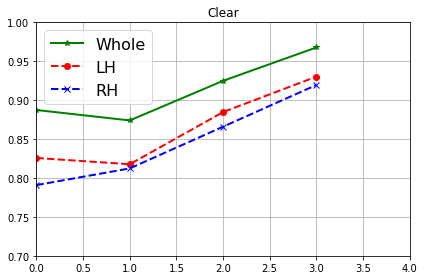

In [51]:
axis_font = {'fontname':'Arial', 'size':'15'}
#tw1=tad.iloc[1:,0];Acdw1=tad.iloc[1:,1];
tw1=a.iloc[0:,0];Acdw=a.iloc[0:,1];Acdlh=a.iloc[0:,2];Acdrh=a.iloc[0:,3]
# plt.plot(tw1,Acdw1,c='g')
plt.plot(tw1,Acdw,'g',linewidth=2,marker='*')
plt.plot(tw1, Acdlh,'--r',linewidth=2,marker='o')
plt.plot(tw1, Acdrh,'--b',linewidth=2,marker='x')
plt.title("Clear")
plt.xlim(0,4)
plt.ylim(0.7,1)
plt.grid(True)
plt.tight_layout()
plt.gca().legend(('Whole','LH','RH'),fontsize=16,loc='best')
# plt.savefig('whole_acc_timem.eps')
# plt.savefig('whole_acc_timem.tif')
plt.show()

In [52]:
len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

34.67741935483871

In [53]:
# dall

In [54]:
X_train.shape

(1488, 136)

In [55]:
type(whc)

pandas.core.frame.DataFrame

In [56]:
## Ffe: Fulll features altogether
Ffe=pd.concat([whc,lhacau,rhacau],axis=1, keys=[ "Whole", "LH", "RH"])
Ffe

,Whole,LH,RH
,0,0,0
0,0.949062,0.938338,0.919571
1,0.947525,0.934139,0.916167


In [57]:
## bb: is the sub band frequency
bb=a.iloc[:,1:]

In [58]:
## Here the 1st and 2nd rows are accand roc for full brain
## Here from 3rd row theta,alpha beta,and gamma
# wrpath="/home/sultan/EEG/Source_level_frequency_analysis/Results/"
bandallclean=pd.concat([Ffe*100,bb*100],axis=0)
# # bandallclean.iloc[0:,:]
bandallclean
# bandallclean.to_csv(wrpath+str(rs)+'Clear_band.csv')

,Whole,LH,RH
,0,0,0
0,94.906166,93.833780,91.957105
1,94.752542,93.413860,91.616705
0,88.739946,82.573727,79.088472
1,87.399464,81.769437,81.233244
2,92.493298,88.471850,86.595174
3,96.782842,93.029491,91.957105


In [59]:
# clear=bandallclean.values[1,:].tolist()
# noise=bandallclean.values[2,:].tolist()

In [60]:
# clear

In [61]:
# # clear=bandallclean.values[1,:].tolist()
# # noise=bandallclean.values[2,:].tolist()
# n_groups = 3
# # clear = (61.29,54.83,54.83,61.29)
# # noise = (85, 62, 54, 20)
# #Random shuffle
# # clear = [96.24,94.63,91.12]
# # noise = [92.79,92.24,91.96] 
# # create plot
# axis_font = {'fontname':'Arial', 'size':'16'}
# fig, ax = plt.subplots()
# index = np.arange(n_groups)
# bar_width = 0.40
# opacity = 0.85
# rects1 = plt.bar(index, clear, bar_width,
#                  alpha=opacity,
#                  color='g',
#                  label='Clear')
 
# rects2 = plt.bar(index + bar_width, noise, bar_width,
#                  alpha=opacity,
#                  color='gray',
#                  label='Noise') 
# plt.xlabel('Analysis scenarios',**axis_font)
# plt.ylabel('Accuracy (%)',**axis_font)
# plt.title('Spectral analysis',**axis_font)
# plt.ylim(50,100)
# plt.xticks(index + bar_width-0.2, ('Whole-brain','LH', 'RH'),**axis_font)
# # plt.xticks(index + bar_width-0.2, (r'$\theta$',r'$\alpha$', r'$\beta$', r'$\gamma$'),**axis_font)
# plt.yticks(**axis_font)
# plt.legend(fontsize=14,loc=10)
# # plt.grid(True)
# plt.tight_layout()
# plt.show()

In [62]:
# clear=bandallclean.values[2:,0].tolist()
# noise=bandallclean.values[2:,1].tolist()

In [63]:
# clear

In [64]:
# n_groups = 4
# # clear = (61.29,54.83,54.83,61.29)
# # noise = (85, 62, 54, 20)
# #Random shuffle
# # clear = [67.74,70.97,54.84,48.38]
# # noise = [54.84,45.16,38.71,45.16] 
# # create plot
# axis_font = {'fontname':'Arial', 'size':'16'}
# fig, ax = plt.subplots()
# index = np.arange(n_groups)
# bar_width = 0.40
# opacity = 0.85
# rects1 = plt.bar(index, clear, bar_width,
#                  alpha=opacity,
#                  color='g',
#                  label='Clear')
 
# rects2 = plt.bar(index + bar_width, noise, bar_width,
#                  alpha=opacity,
#                  color='gray',
#                  label='Noise') 
# plt.xlabel('Frequency band',**axis_font)
# plt.ylabel('Accuracy (%)',**axis_font)
# plt.title('Whole brain',**axis_font)
# plt.ylim(70,100)
# #plt.xticks(index + bar_width-0.2, ('Theta','Alpha', 'Beta', 'Gamma'))
# plt.xticks(index + bar_width-0.2, (r'$\theta$',r'$\alpha$', r'$\beta$', r'$\gamma$'),**axis_font)
# plt.yticks(**axis_font)
# plt.legend(fontsize=14,loc='center')
# # plt.legend(fontsize=14)
# plt.tight_layout()
# plt.show()

#### Writing into a csv file

In [65]:
bandallclean

,Whole,LH,RH
,0,0,0
0,94.906166,93.833780,91.957105
1,94.752542,93.413860,91.616705
0,88.739946,82.573727,79.088472
1,87.399464,81.769437,81.233244
2,92.493298,88.471850,86.595174
3,96.782842,93.029491,91.957105


In [66]:
# wrpath="/home/sultan/EEG/Source_level_frequency_analysis/Results/"
# bandallclean=pd.concat([Ffe*100,bb*100],axis=0)
# # bandallclean.iloc[0:,:]
# bandallclean
# bandallclean.to_csv(wrpath+str(rs)+'Clear_band.csv')
# wrpath+str(rs)+'Clear_band.csv'

In [67]:
rs

16